In [1]:
from IPython.display import display
import pandas as pd
from datetime import datetime
import yfinance as yf
from matplotlib import pyplot as plt

## Defining Current Portfolio

In [2]:
equities_strategyA = [
    'ARNC',
    'ABT',
    'ADSK',
    'ADBE',
    'ADI',
    'AEP',
    'AES',
    'AFL',
    'AMD',
    'ADP'
]

equities_strategyB = [
    'ENDP',
    'MDCO',
    'WW',
    'STMP',
    'INFN',
    'SEMG',
    'MIK',
    'RETA',
    'CLDR',
    'HOME',
]




current_B = pd.DataFrame([95480,
8700,
12880,
5400,
79540,
27880,
52900,
2180,
52840,
51780],
                        index = equities_strategyB,
                        columns = ['Shares Holding'])

current_A = pd.DataFrame([15860,
6160,
2520,
2720,
3620,
3620,
21800,
6760,
14840,
2600], 
                        index = equities_strategyA,
                        columns = ['Shares Holding'])

Note that all shares were bought on November 10th.

In [3]:
current_B['BuyPrice'] = [
    4.33,
    55.01,
    34.27,
    91.50,
    5.30,
    16.07,
    9.08,
    209.88,
    8.75,
    8.71,
]

current_A['BuyPrice'] = [
    28.97,
    83.74,
    152.96,
    292.02,
    113.02,
    89.02,
    17.64,
    54.14,
    36.26,
    162.73,
]

In [4]:
portfolio = pd.concat([current_A, current_B], axis=0)
portfolio

,Shares Holding,BuyPrice
ARNC,15860,28.97
ABT,6160,83.74
ADSK,2520,152.96
ADBE,2720,292.02
ADI,3620,113.02
AEP,3620,89.02
AES,21800,17.64
AFL,6760,54.14
AMD,14840,36.26
ADP,2600,162.73


## Getting Historical Data

In [5]:
end = datetime.now().strftime("%Y-%m-%d")
start = '2019-11-10'


historical_data = yf.download(list(portfolio.index),
                             start,
                             end)['Close']

[*********************100%***********************]  20 of 20 completed


In [6]:
pnl = historical_data - portfolio['BuyPrice']
pnl = pnl*portfolio['Shares Holding']

## Plotting Returns

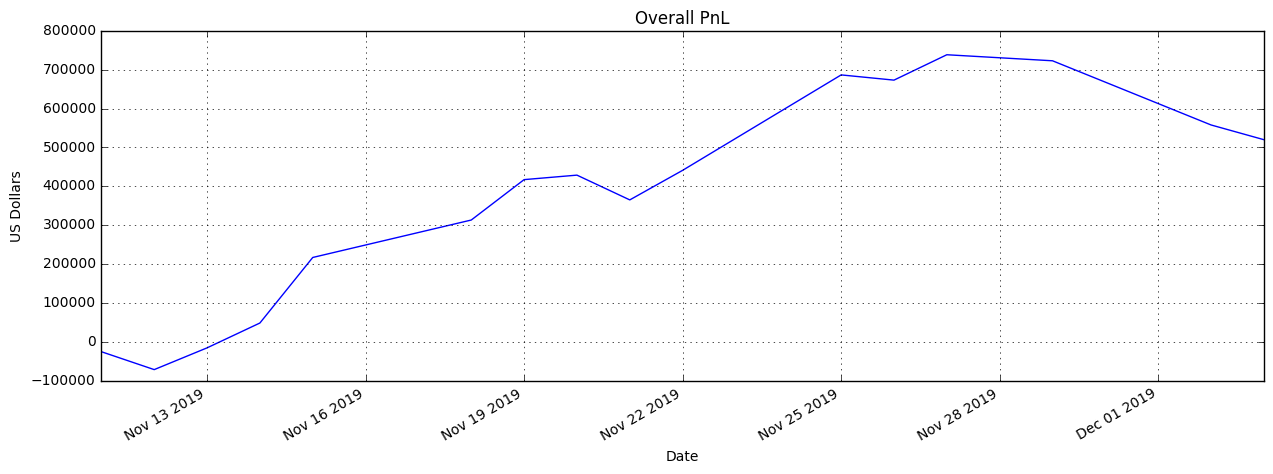

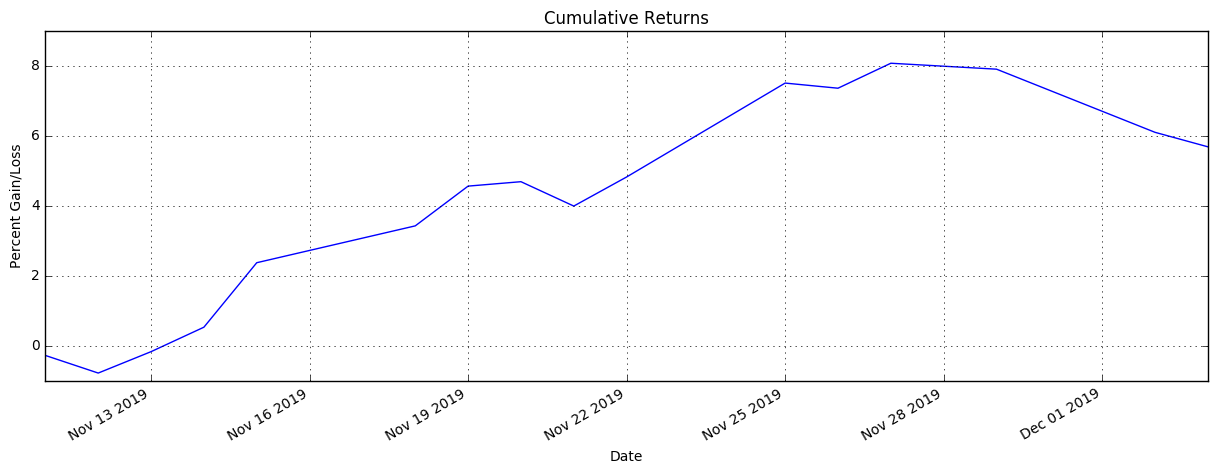

In [7]:
plt.figure(figsize=(15, 5))
pnl.sum(axis=1).plot(figsize=(15, 5), title='Overall PnL'); plt.grid(); plt.ylabel('US Dollars')


plt.figure(figsize=(15, 5))
(100 * pnl.sum(axis=1)/(portfolio['BuyPrice']*portfolio['Shares Holding']).sum()).plot(
figsize=(15, 5), title='Cumulative Returns'); plt.grid(); plt.ylabel('Percent Gain/Loss')

plt.show()
